In [6]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
#https://www.kaggle.com/prachi13/customer-analytics
#https://medium.com/@hjhuney/implementing-a-random-forest-classification-model-in-python-583891c99652

In [7]:
df = pd.read_csv(r'C:\Users\PRM\Documents\Projects\Python\E-Commerce Shipping Data\train.csv')

In [8]:
df = df.drop(['ID'],axis=1)

In [9]:
df.shape

(10999, 11)

<AxesSubplot:>

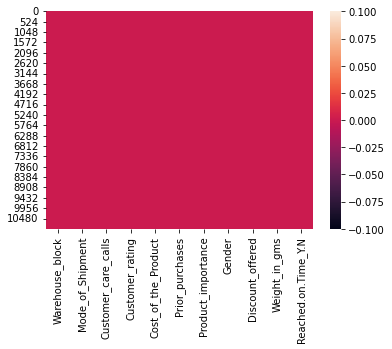

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 773.4+ KB


In [12]:
df.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


# Cleaning

In [13]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [14]:
le = preprocessing.LabelEncoder()

In [15]:
c = df

In [16]:
c['Mode_of_Shipment']= le.fit_transform(c['Mode_of_Shipment'])
c['Warehouse_block'] = le.fit_transform(c['Warehouse_block'])
c['Product_importance'] = le.fit_transform(c['Product_importance'])
c['Gender'] = le.fit_transform(c['Gender'])
#c.head(50)
#c

In [17]:
c.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,3,0,4,2,177,3,1,0,44,1233,1
1,4,0,4,5,216,2,1,1,59,3088,1
2,0,0,2,2,183,4,1,1,48,3374,1
3,1,0,3,3,176,4,2,1,10,1177,1
4,2,0,2,2,184,3,2,0,46,2484,1


# Exploratory Data Analysis

<AxesSubplot:>

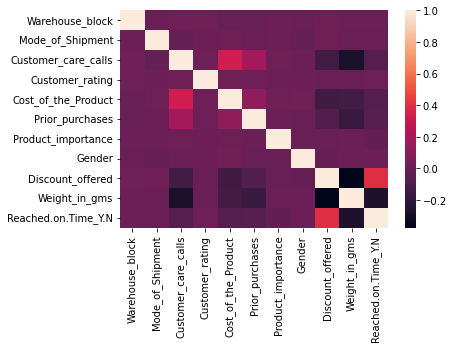

In [18]:
sns.heatmap(c.corr())

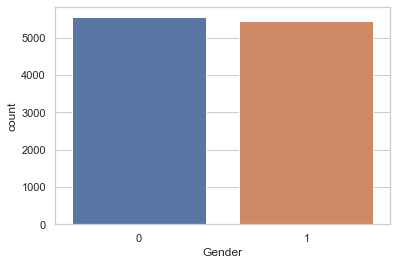

In [19]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="Gender", data=df)

In [20]:
df.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

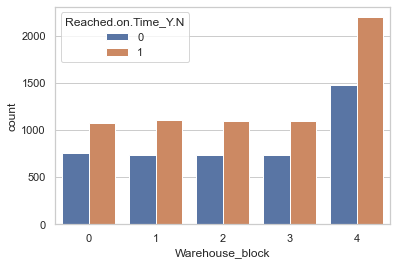

In [21]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="Warehouse_block",hue = 'Reached.on.Time_Y.N', data=df)

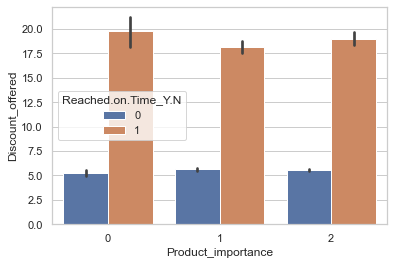

In [22]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Product_importance", y="Discount_offered",hue='Reached.on.Time_Y.N', data=df)

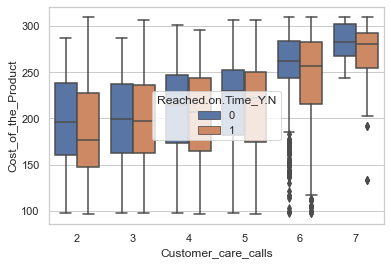

In [23]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="Customer_care_calls", y="Cost_of_the_Product",hue='Reached.on.Time_Y.N', data=df)

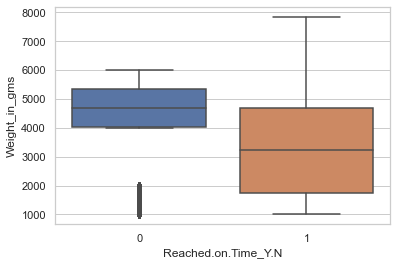

In [24]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="Reached.on.Time_Y.N", y="Weight_in_gms", data=df)

# Pre-Processing

In [25]:
c.columns.tolist()

['Warehouse_block',
 'Mode_of_Shipment',
 'Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Product_importance',
 'Gender',
 'Discount_offered',
 'Weight_in_gms',
 'Reached.on.Time_Y.N']

In [26]:
X = c.iloc[:,:-1]##c[['Customer_rating','Discount_offered','Warehouse_block']].astype('int')
y=c['Reached.on.Time_Y.N']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression

In [28]:
lr = sm.Logit(y_train, X_train).fit(method='newton')
print(lr.summary())

Optimization terminated successfully.
         Current function value: 0.549136
         Iterations 8
                            Logit Regression Results                           
Dep. Variable:     Reached.on.Time_Y.N   No. Observations:                 7699
Model:                           Logit   Df Residuals:                     7689
Method:                            MLE   Df Model:                            9
Date:                 Mon, 08 Nov 2021   Pseudo R-squ.:                  0.1868
Time:                         23:50:35   Log-Likelihood:                -4227.8
converged:                        True   LL-Null:                       -5199.0
Covariance Type:             nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Warehouse_block         0.0179      0.017      1.041      0.298      -0.016       

In [29]:
predictions = lr.predict(X_train)
predictions = list(map(round, predictions))

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(metrics.confusion_matrix(y_train, predictions))
print(classification_report(y_train, predictions))

[[1846 1278]
 [1509 3066]]
              precision    recall  f1-score   support

           0       0.55      0.59      0.57      3124
           1       0.71      0.67      0.69      4575

    accuracy                           0.64      7699
   macro avg       0.63      0.63      0.63      7699
weighted avg       0.64      0.64      0.64      7699



In [31]:
predictions = lr.predict(X_test)
predictions = list(map(round, predictions))

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(metrics.confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[ 771  541]
 [ 662 1326]]
              precision    recall  f1-score   support

           0       0.54      0.59      0.56      1312
           1       0.71      0.67      0.69      1988

    accuracy                           0.64      3300
   macro avg       0.62      0.63      0.62      3300
weighted avg       0.64      0.64      0.64      3300



# Random Forest

In [33]:
#scaling the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')

In [37]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[ 927  385]
 [ 725 1263]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.56      0.71      0.63      1312
           1       0.77      0.64      0.69      1988

    accuracy                           0.66      3300
   macro avg       0.66      0.67      0.66      3300
weighted avg       0.68      0.66      0.67      3300



=== All AUC Scores ===
[0.99696101 0.99950181 0.99641987 0.99885671 0.87479057 0.45447944
 0.50990854 0.47903963 0.4968465  0.48182775]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.7288631835791183


In [39]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,3,0,4,2,177,3,1,0,44,1233,1
1,4,0,4,5,216,2,1,1,59,3088,1
2,0,0,2,2,183,4,1,1,48,3374,1
3,1,0,3,3,176,4,2,1,10,1177,1
4,2,0,2,2,184,3,2,0,46,2484,1


In [40]:
df.shape

(10999, 11)